# Import Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

random_state = 3

2024-05-26 18:41:48.279900: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def plot_model_history(history):
    """Plot the training and validation history for a TensorFlow network"""

    # Extract loss and accuracy
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["MAPE"]
    val_acc = history.history["val_MAPE"]
    n_epochs = len(loss)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].plot(np.arange(n_epochs), loss, label="Training")
    ax[0].plot(np.arange(n_epochs), val_loss, label="Validation")
    ax[0].legend()
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")

    ax[1].plot(np.arange(n_epochs), acc, label="Training")
    ax[1].plot(np.arange(n_epochs), val_acc, label="Validation")
    ax[1].legend()
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Mean Absolute Percent Error")


In [3]:
NN_data = pd.read_csv("Data/NNData.csv")
NN_data

,Index,DT,Energy,Jan,Feb,Mar,Apr,May,Jun,Jul,...,BankHols,RetailHols,WkBeforeXMas,WkAfterXMas,Trend2010,AvgDB,LagDB,Lag2DB,AvgWind,AvgClouds
0,0,1/1/17,242.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.00,46.77,36.66,36.72,5.24,4.39
1,1,1/2/17,257.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.01,45.10,46.77,36.66,5.66,8.00
2,2,1/3/17,265.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.01,45.37,45.10,46.77,5.63,7.75
3,3,1/4/17,253.79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.01,48.87,45.37,45.10,8.61,3.71
4,4,1/5/17,305.91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.01,34.49,48.87,45.37,3.84,6.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,12/27/19,262.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.99,47.83,43.47,39.38,2.08,3.76
1091,1091,12/28/19,238.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.99,51.19,47.83,43.47,1.76,1.86
1092,1092,12/29/19,240.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.99,53.24,51.19,47.83,3.33,7.78
1093,1093,12/30/19,235.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.00,62.12,53.24,51.19,9.17,3.87


In [4]:
X = NN_data.values[:,3:]
y = NN_data.values[:,2]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
np.shape(X_train_val)

(985, 27)

In [5]:
X_train_two = np.asarray(X_train_val).astype('float32')
X_test_two = np.asarray(X_test).astype('float32')
y_train_two = np.asarray(y_train_val).astype('float32').reshape(-1,1)
y_test_two = np.asarray(y_test).astype('float32').reshape(-1, 1)

In [6]:
#X_train_two[:,26]

In [12]:
np.shape(X_train_two)

(985, 27)

In [7]:
# Initialize the model. 
model = Sequential(name="sequantial1")
# For each layer you need to add the number of Neurons and the activation. 
# We have 27 features so that goes in input_shape
model.add(Dense(32, input_shape=(27,), name="fc1"))
model.add(Activation(activation="sigmoid", name="relu1"))
model.add(Dense(32, name="fc2"))
model.add(Activation(activation="sigmoid", name="relu2"))
model.add(Dense(1, name="fc4"))
model.summary()

Model: "sequantial1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 32)                896       
                                                                 
 relu1 (Activation)          (None, 32)                0         
                                                                 
 fc2 (Dense)                 (None, 32)                1056      
                                                                 
 relu2 (Activation)          (None, 32)                0         
                                                                 
 fc4 (Dense)                 (None, 1)                 33        
                                                                 
Total params: 1985 (7.75 KB)
Trainable params: 1985 (7.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-05-26 18:41:52.524126: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9622 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:64:00.0, compute capability: 7.5


In [8]:
model.compile(optimizer="sgd", loss=["MSE"], metrics=["MAPE"])
history = model.fit(X_train_two, y_train_two, batch_size=1024, epochs=80, validation_split=0.25, shuffle=True, verbose=0)

2024-05-26 18:41:54.024099: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdf8fe2b130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-26 18:41:54.024149: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-05-26 18:41:54.158983: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-05-26 18:41:54.294498: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1856.5703125
12.78586196899414


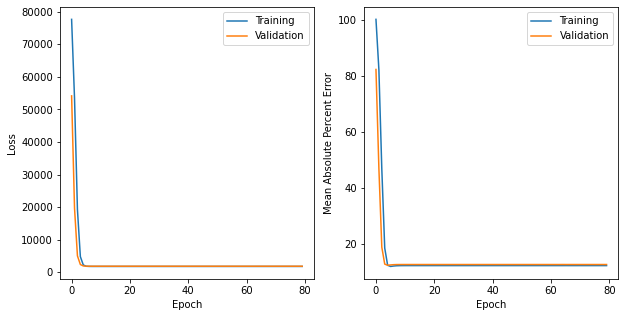

In [9]:
plot_model_history(history)
print(str(history.history["val_loss"][49]))
print(str(history.history["val_MAPE"][49]))

In [10]:
np.shape(X_test_two)
y_keras = model.predict(X_test_two, batch_size=10, verbose=0)

In [11]:
print(np.shape(y_keras))
print(y_keras)

(110, 1)
[[274.99292]
 [275.00583]
 [275.11743]
 [274.9958 ]
 [274.99557]
 [275.06927]
 [275.0528 ]
 [274.98056]
 [274.97995]
 [275.06384]
 [274.9854 ]
 [275.07123]
 [274.99384]
 [275.01788]
 [275.10278]
 [275.0681 ]
 [274.99927]
 [274.97733]
 [275.0743 ]
 [274.98245]
 [274.98862]
 [275.03775]
 [275.12155]
 [275.08734]
 [275.16196]
 [275.06235]
 [274.993  ]
 [275.0113 ]
 [275.09747]
 [274.9969 ]
 [275.1104 ]
 [275.0346 ]
 [275.0715 ]
 [274.99524]
 [274.98718]
 [274.99844]
 [275.00854]
 [274.978  ]
 [275.01147]
 [275.1129 ]
 [275.1107 ]
 [275.01038]
 [274.9808 ]
 [275.11234]
 [274.97903]
 [275.11826]
 [275.05618]
 [274.98248]
 [275.00366]
 [274.9794 ]
 [274.99353]
 [275.08557]
 [275.1138 ]
 [275.03387]
 [274.98328]
 [275.01627]
 [275.01367]
 [274.97916]
 [274.99432]
 [275.06235]
 [275.11377]
 [275.00467]
 [274.99588]
 [275.03226]
 [275.03842]
 [275.08224]
 [275.11594]
 [275.00577]
 [275.05716]
 [275.01114]
 [275.0849 ]
 [275.05814]
 [275.0595 ]
 [274.9927 ]
 [275.0285 ]
 [275.04944]
 [2

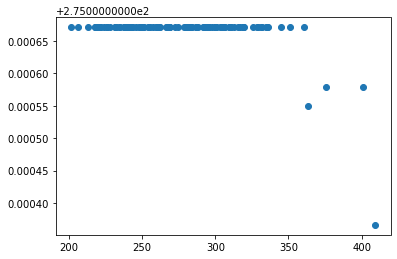

In [55]:
plt.scatter(y_test, y_keras)